In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap, BoundaryNorm

In [2]:
def scale_data(scale_the_data):
    # to work on copy of the data
    data_scaled = scale_the_data.copy()

    # Scaling the data to keep the different attributes in same range.
    data_scaled[data_scaled.columns] = StandardScaler().fit_transform(data_scaled)

    return data_scaled

def sorted_cluster(x, model=None):
    if model == None:
        model = KMeans()
    model = sorted_cluster_centers_(model, x)
    model = sorted_labels_(model, x)
    return model

def sorted_cluster_centers_(model, x):
    model.fit(x)
    new_centroids = []
    magnitude = []
    for center in model.cluster_centers_:
        magnitude.append(np.sqrt(center.dot(center)))
    idx_argsort = np.argsort(magnitude)
    model.cluster_centers_ = model.cluster_centers_[idx_argsort]
    return model

def sorted_labels_(sorted_model, x):
    sorted_model.labels_ = sorted_model.predict(x)
    return sorted_model

In [3]:
data = pd.read_csv("air_sensor001_data.csv")
data = data.sort_values(by='Datetime')
data_sort = data.drop(columns = 'Datetime')
data_sort = data_sort.drop(columns = 'Unnamed: 0')
data_sort = data_sort.drop(columns = 'csq')
data_sort = data_sort.drop(columns = 'deviceid')
data_sort.head()

,eco2,ethanol,h2,pm10,pm100,pm25,rh,temp,voc
0,634,18727,12998,5,7,6,51,25,288
1,606,18710,13023,5,7,7,51,25,296
2,715,18732,12936,6,8,8,51,25,279
3,699,18690,12948,5,6,6,51,25,311
4,695,18737,12958,5,6,6,51,25,273


In [4]:
df_scale = scale_data(data_sort)
df_scale.head()

,eco2,ethanol,h2,pm10,pm100,pm25,rh,temp,voc
0,-0.136132,0.443187,0.200916,-0.938879,-0.954160,-1.073926,-1.701244,-0.243506,-0.226322
1,-0.158958,0.399111,0.288873,-0.938879,-0.954160,-0.956266,-1.701244,-0.243506,-0.222882
2,-0.070098,0.456151,-0.017218,-0.759670,-0.845742,-0.838605,-1.701244,-0.243506,-0.230193
3,-0.083142,0.347256,0.025001,-0.938879,-1.062579,-1.073926,-1.701244,-0.243506,-0.216430
4,-0.086403,0.469115,0.060184,-0.938879,-1.062579,-1.073926,-1.701244,-0.243506,-0.232774


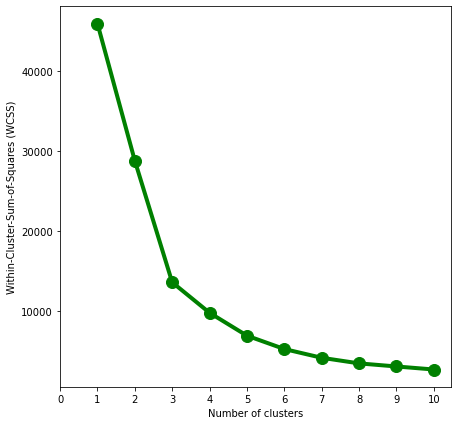

In [5]:
x = df_scale[['voc','pm25']].values

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("Within-Cluster-Sum-of-Squares (WCSS)")
plt.show()

In [6]:
df = df_scale[['voc','pm25']]
kmeans = KMeans(n_clusters=6)
cluster = sorted_cluster(df, kmeans)
data_sort['label'] = cluster.labels_
data_sort['Datetime'] = data['Datetime']
data_sort.to_csv('2Dtest_PM.csv')

<AxesSubplot:xlabel='label', ylabel='count'>

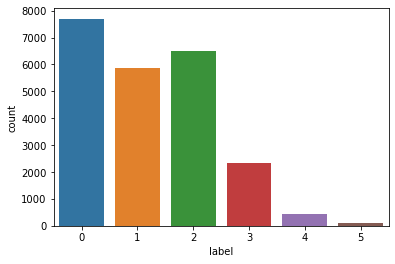

In [7]:
sns.countplot(x=data_sort['label'])

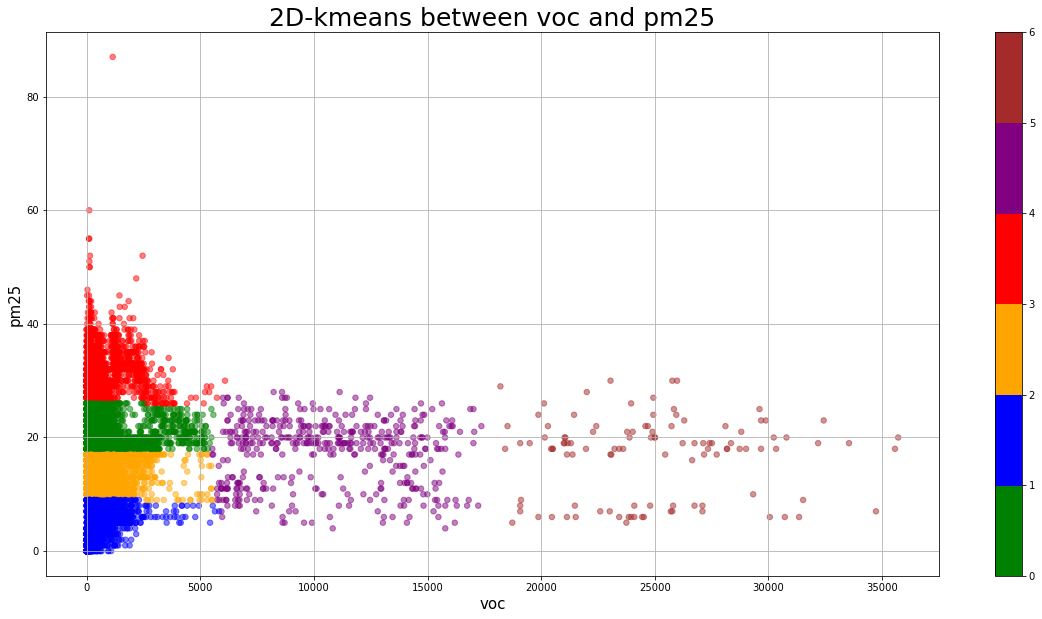

In [8]:
fig = plt.figure(figsize=(20,10))

cmap = ListedColormap(['green','blue','orange','red','purple','brown'])
norm = BoundaryNorm([0,1,2,3,4,5,6], cmap.N)
bar = cm.ScalarMappable(norm=norm, cmap=cmap)
fig.colorbar(bar)

cmaps = ListedColormap(['orange','green','blue','red','purple','brown'])
plt.scatter(data_sort['voc'], data_sort['pm25'], c= cluster.labels_.astype(float), s=30, alpha=0.5,cmap=cmaps)
plt.title('2D-kmeans between voc and pm25',fontsize=25)
plt.xlabel('voc',fontsize=15)
plt.ylabel('pm25',fontsize=15)
plt.grid()
fig.patch.set_facecolor('white')
plt.show()